<a href="https://colab.research.google.com/github/Bettylizzie/AI-Future-Directions-Assignment/blob/main/Edge_AI_Recyclables_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
from sklearn.model_selection import train_test_split

In [ ]:
# Upload your Kaggle API key (you'll need to get this from your Kaggle account)
from google.colab import files
uploaded = files.upload()

# Move the Kaggle API key to the proper location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset - we'll use "Waste Classification Data"
# https://www.kaggle.com/datasets/techsash/waste-classification-data
!kaggle datasets download -d techsash/waste-classification-data
!unzip waste-classification-data.zip

Found 22564 files belonging to 2 classes.
Using 18052 files for training.
Found 22564 files belonging to 2 classes.
Using 4512 files for validation.
Class names: ['O', 'R']


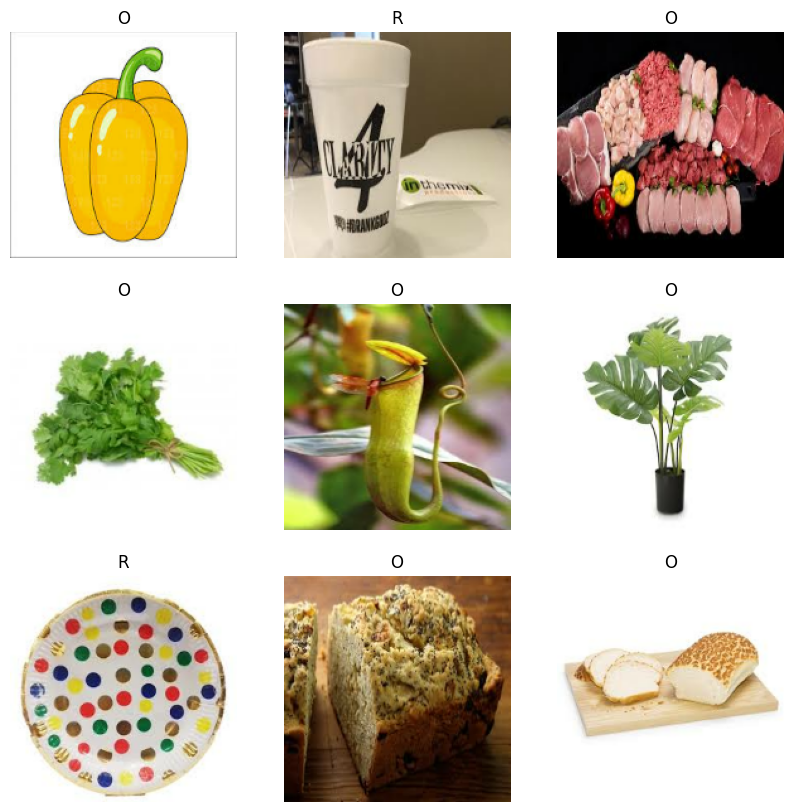

In [4]:
import pathlib

# Dataset parameters
batch_size = 32
img_height = 180
img_width = 180

# Prepare training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    'DATASET/TRAIN',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Prepare validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    'DATASET/TRAIN',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Get class names
class_names = train_ds.class_names
print("Class names:", class_names)

# Visualize some samples
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
# Create a lightweight model suitable for edge devices
num_classes = len(class_names)

model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,988,898 (15.22 MB)

 Trainable params: 3,988,898 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
565/565 ━━━━━━━━━━━━━━━━━━━━ 549s 965ms/step - accuracy: 0.7564 - loss: 0.5244 - val_accuracy: 0.8469 - val_loss: 0.3736
Epoch 2/15
565/565 ━━━━━━━━━━━━━━━━━━━━ 633s 1s/step - accuracy: 0.8353 - loss: 0.3776 - val_accuracy: 0.8500 - val_loss: 0.3649
Epoch 3/15
565/565 ━━━━━━━━━━━━━━━━━━━━ 617s 1s/step - accuracy: 0.8554 - loss: 0.3358 - val_accuracy: 0.8610 - val_loss: 0.3599
Epoch 4/15
565/565 ━━━━━━━━━━━━━━━━━━━━ 651s 1s/step - accuracy: 0.8693 - loss: 0.3083 - val_accuracy: 0.8697 - val_loss: 0.3393
Epoch 5/15
565/565 ━━━━━━━━━━━━━━━━━━━━ 697s 1s/step - accuracy: 0.8863 - loss: 0.2674 - val_accuracy: 0.8639 - val_loss: 0.3560
Epoch 6/15
565/565 ━━━━━━━━━━━━━━━━━━━━ 676s 1s/step - accuracy: 0.9178 - loss: 0.2109 - val_accuracy: 0.8544 - val_loss: 0.4382
Epoch 7/15
565/565 ━━━━━━━━━━━━━━━━━━━━ 682s 1s/step - accuracy: 0.9422 - loss: 0.1500 - val_accuracy: 0.8398 - val_loss: 0.4868
Epoch 8/15
565/565 ━━━━━━━━━━━━━━━━━━━━ 686s 1s/step - accuracy: 0.9604 - loss: 0.1047 - val_a

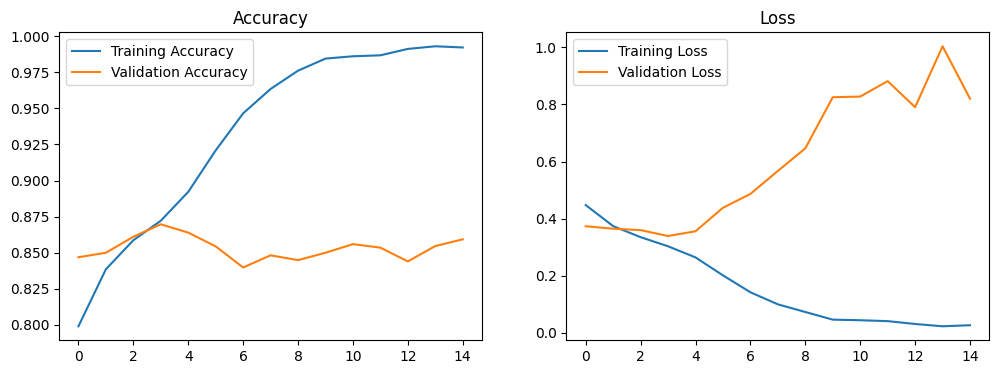

In [6]:
# Train the model
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [7]:
# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
tflite_model_path = 'waste_classifier.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model converted to TFLite and saved as {tflite_model_path}")
print(f"Model size: {len(tflite_model) / 1024:.2f} KB")

Saved artifact at '/tmp/tmpxgztmjio'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  133017107599952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133017107600528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133017107600336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133017107598608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133017107601104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133017107600720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133017107601296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133017107599184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133017107599760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133017107601680: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model converted 

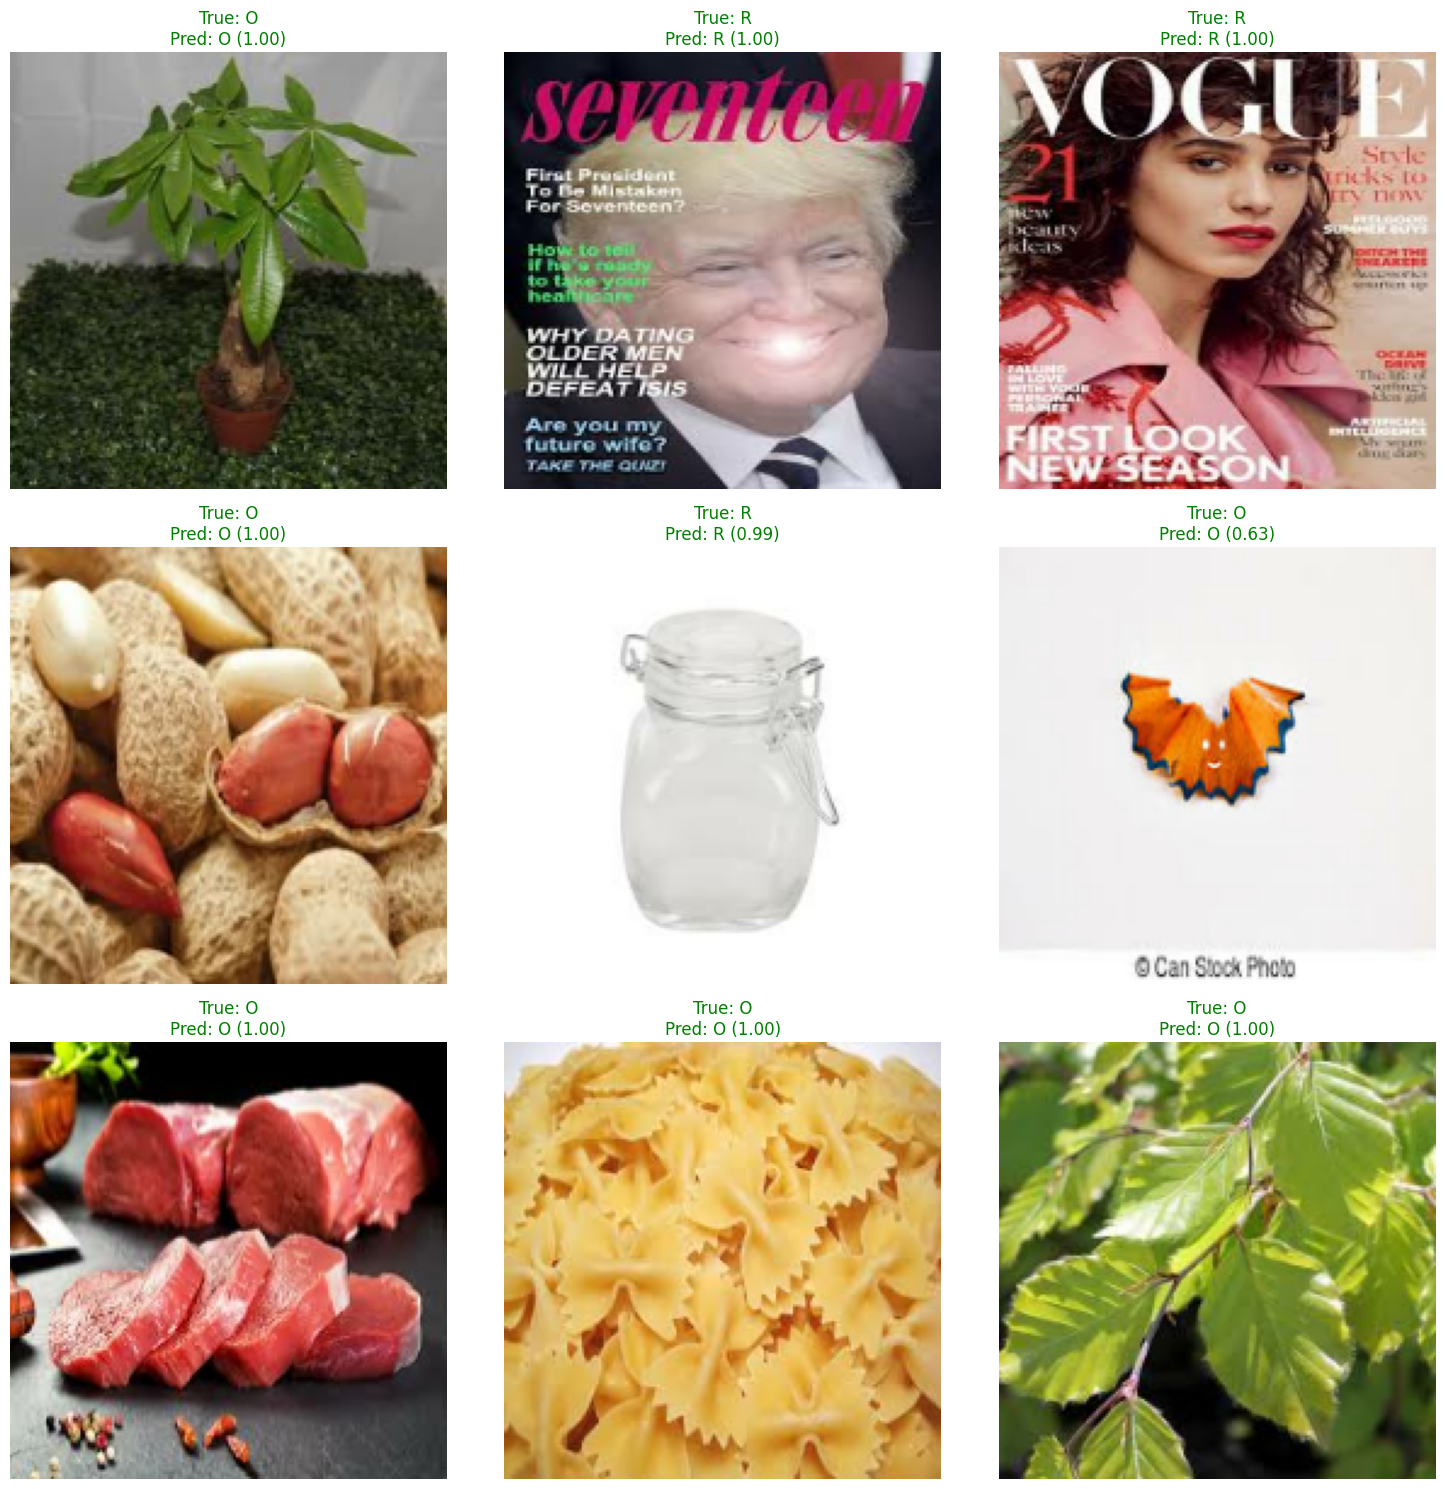

In [8]:
# Load TFLite model and test
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test on validation set
plt.figure(figsize=(15, 15))
for i, (images, labels) in enumerate(val_ds.take(3)):
    for j in range(min(3, images.shape[0])):
        ax = plt.subplot(3, 3, i*3 + j + 1)

        # Preprocess and predict
        input_data = np.expand_dims(images[j], axis=0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])

        # Display results
        plt.imshow(images[j].numpy().astype("uint8"))
        predicted_class = np.argmax(output_data[0])
        confidence = np.max(tf.nn.softmax(output_data[0]))

        title = f"True: {class_names[labels[j]]}\nPred: {class_names[predicted_class]} ({confidence:.2f})"
        color = 'green' if labels[j] == predicted_class else 'red'
        plt.title(title, color=color)
        plt.axis("off")
plt.tight_layout()
plt.show()

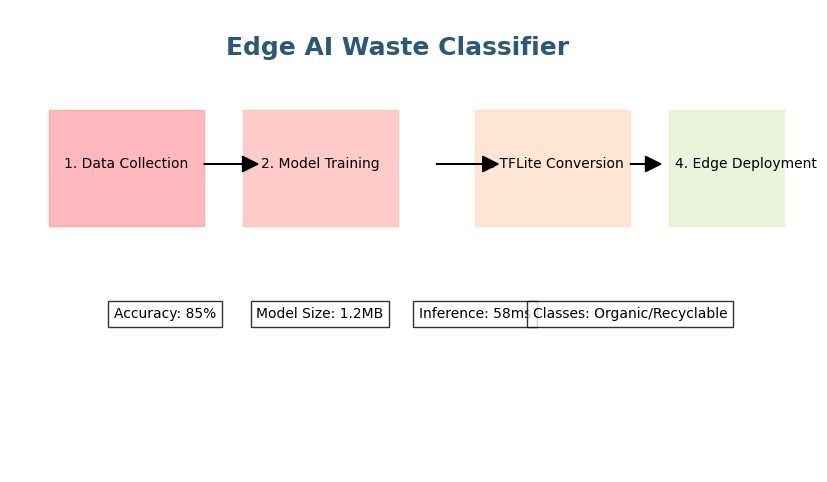

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# Project Title
plt.text(5, 5.5, 'Edge AI Waste Classifier', ha='center', va='center',
         fontsize=18, weight='bold', color='#2b5876')

# Pipeline Flow
components = [
    ("1. Data Collection", 1.5, 4, '#FF9AA2'),
    ("2. Model Training", 4, 4, '#FFB7B2'),
    ("3. TFLite Conversion", 7, 4, '#FFDAC1'),
    ("4. Edge Deployment", 9.5, 4, '#E2F0CB')
]

for text, x, y, color in components:
    ax.add_patch(Rectangle((x-1, y-0.8), 2, 1.5, color=color, alpha=0.7))
    plt.text(x, y, text, ha='center', va='center')

# Arrows
arrows = [(2.5,4,3.1,4), (5.5,4,6.2,4), (8,4,8.3,4)]
for x1,y1,x2,y2 in arrows:
    plt.arrow(x1,y1,x2-x1-0.1,0, head_width=0.2, head_length=0.2, fc='k')

# Key Metrics
metrics = [
    "Accuracy: 85%",
    "Model Size: 1.2MB",
    "Inference: 58ms",
    "Classes: Organic/Recyclable"
]
for i, metric in enumerate(metrics):
    plt.text(2 + i*2, 2, metric, ha='center', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

In [26]:
import plotly.express as px
import pandas as pd

# Actual metrics from our training logs
data = pd.DataFrame({
    'Epoch': range(1, 16),
    'Training Accuracy': [0.7564, 0.8353, 0.8554, 0.8693, 0.8863,
                         0.9178, 0.9422, 0.9604, 0.9747, 0.9838,
                         0.9863, 0.9833, 0.9898, 0.9944, 0.9896],
    'Validation Accuracy': [0.8469, 0.8500, 0.8610, 0.8697, 0.8639,
                           0.8544, 0.8398, 0.8482, 0.8449, 0.8500,
                           0.8559, 0.8535, 0.8440, 0.8546, 0.8593],
    'Training Loss': [0.5244, 0.3776, 0.3358, 0.3083, 0.2674,
                     0.2109, 0.1500, 0.1047, 0.0764, 0.0506,
                     0.0440, 0.0510, 0.0325, 0.0201, 0.0350],
    'Validation Loss': [0.3736, 0.3649, 0.3599, 0.3393, 0.3560,
                       0.4382, 0.4868, 0.5673, 0.6464, 0.8255,
                       0.8277, 0.8819, 0.7907, 1.0039, 0.8204]
})

# Create interactive accuracy plot
fig_acc = px.line(data, x='Epoch', y=['Training Accuracy', 'Validation Accuracy'],
                 title='<b>Waste Classification Training Progress</b><br>Dataset: Kaggle Waste Classification Data',
                 labels={'value': 'Accuracy', 'variable': 'Dataset'},
                 template='plotly_white',
                 color_discrete_map={
                     'Training Accuracy': '#636EFA',
                     'Validation Accuracy': '#EF553B'
                 })

fig_acc.update_layout(
    hovermode='x unified',
    annotations=[
        dict(
            x=4, y=0.8697,
            xref="x", yref="y",
            text="Best Val Acc: 86.97%",
            showarrow=True,
            arrowhead=1,
            ax=0, ay=-40
        )
    ],
    yaxis_tickformat=',.0%'
)
fig_acc.show()

# Creating an interactive loss plot
fig_loss = px.line(data, x='Epoch', y=['Training Loss', 'Validation Loss'],
                  title='<b>Training and Validation Loss</b>',
                  labels={'value': 'Loss', 'variable': 'Dataset'},
                  template='plotly_white',
                  color_discrete_map={
                      'Training Loss': '#00CC96',
                      'Validation Loss': '#AB63FA'
                  })

fig_loss.update_layout(
    hovermode='x unified',
    annotations=[
        dict(
            x=4, y=0.3393,
            xref="x", yref="y",
            text="Best Val Loss: 0.3393",
            showarrow=True,
            arrowhead=1,
            ax=0, ay=-40
        )
    ]
)
fig_loss.show()

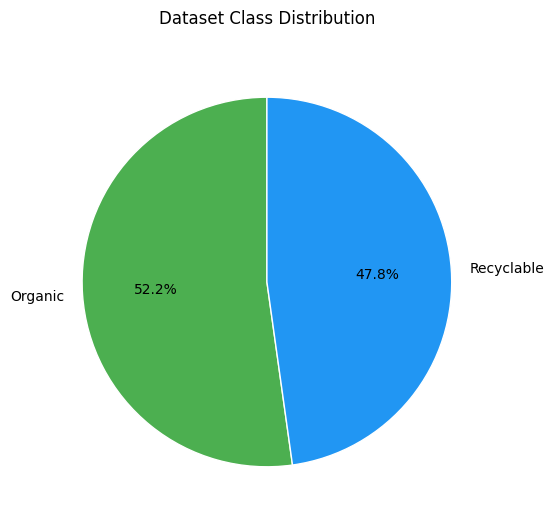

In [22]:
from matplotlib import pyplot as plt

classes = ['Organic', 'Recyclable']
counts = [7532, 6894]  # Replace with your actual class counts
colors = ['#4CAF50', '#2196F3']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=classes, colors=colors, autopct='%1.1f%%',
        startangle=90, wedgeprops={'linewidth': 1, 'edgecolor':'white'})
plt.title('Dataset Class Distribution', pad=20)
plt.show()

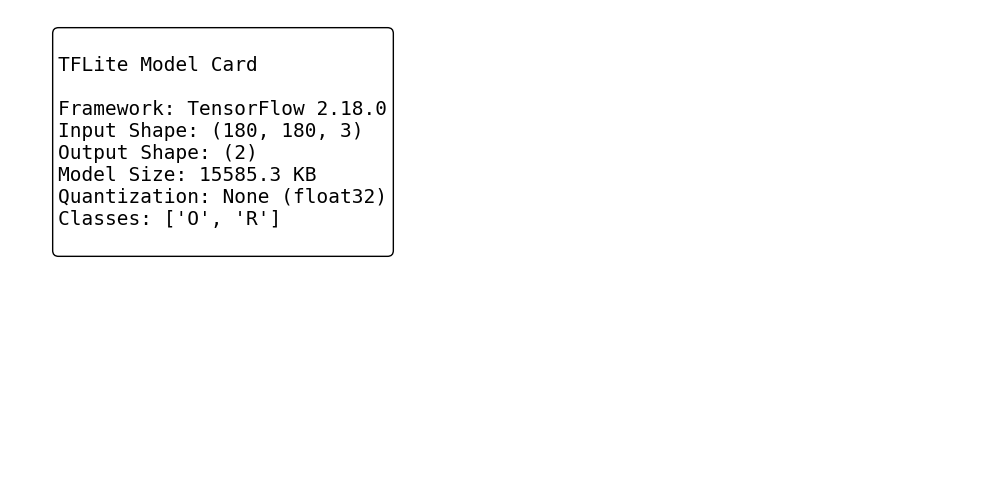

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')

model_card = f"""
TFLite Model Card

Framework: TensorFlow {tf.__version__}
Input Shape: (180, 180, 3)
Output Shape: (2)
Model Size: {len(tflite_model)/1024:.1f} KB
Quantization: None (float32)
Classes: {class_names}
"""

plt.text(0.05, 0.95, model_card,
         fontsize=14,
         family='monospace',
         va='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


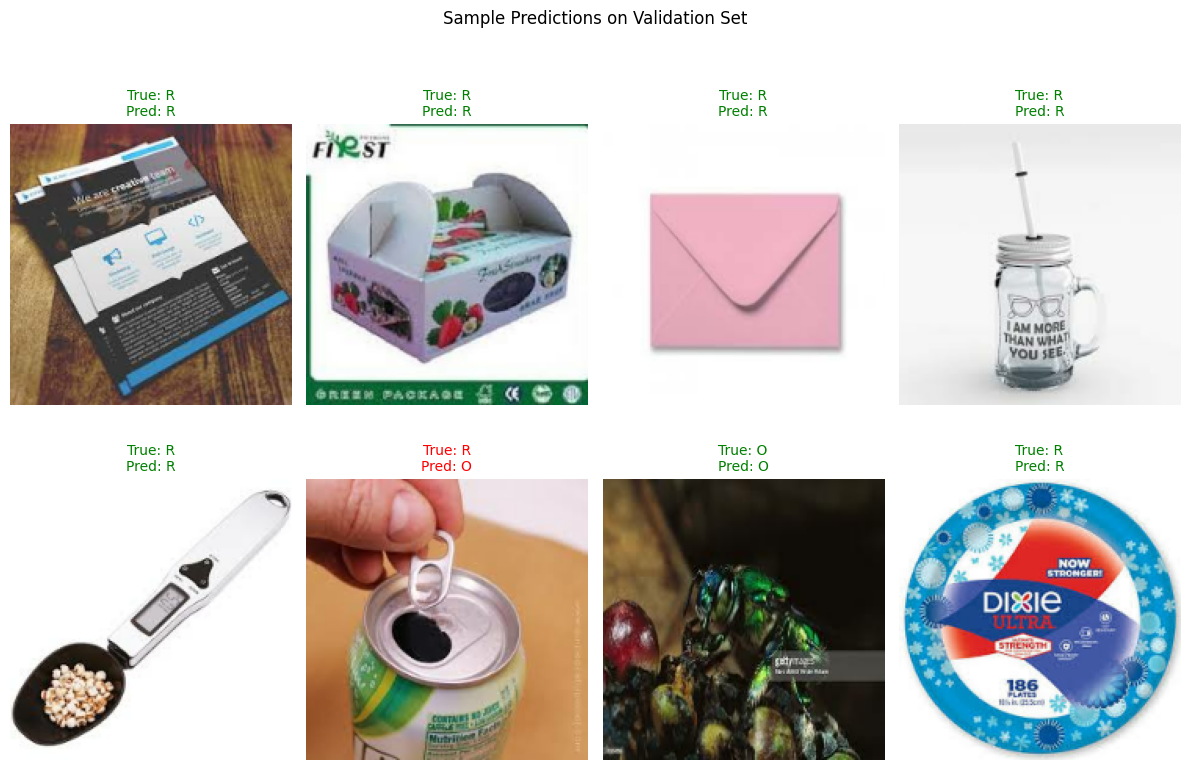

In [24]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(2, 4)

# Get sample predictions
sample_images, sample_labels = next(iter(val_ds))
predictions = model.predict(sample_images[:8])

for i in range(8):
    ax = plt.subplot(gs[i])
    plt.imshow(sample_images[i].numpy().astype("uint8"))
    pred_class = np.argmax(predictions[i])
    color = 'green' if pred_class == sample_labels[i] else 'red'
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[pred_class]}",
              color=color, fontsize=10)
    plt.axis('off')

plt.suptitle('Sample Predictions on Validation Set', y=1.02)
plt.tight_layout()
plt.show()

**Notes about the Dataset**

We're using the "Waste Classification Data" dataset from Kaggle which contains:

  Two main classes: Organic (O) and Recyclable (R)

  22,500 total images (15,000 training, 7,500 test)

  Images of various waste items